### Wprowadzenie

Celem poniższej pracy, jest rozwiązanie sudoku za pomocą algorytmu genetycznego na dwa rózne sposoby oraz porównanie ich efektywności ze sobą. Zasady roziwązywania sudoku są nastepujące:
 - pole gry składa się z dziewięciu bloków 3x3, które tworzą naszą planszę
 - na planszy niektóre pola mamy uzupełnione już liczbami (od 1-9) ilośc uzupelnionych pól różni się w zależności od poziomu trudności
 -celem gry jest wypełnienie wszystkich pól cyframi w taki sposób, aby w jednym bloku 3x3,oraz w każdej kolumnie i wierszu całej planszy każda liczba z 1-9 występowała tylko raz 

## Rozdział 1 

### 1.1 Inicjalizacja planszy

Njapierw należy ustalić w jaki sposób będziemy kodować nasze sudoku. Będziemy je reprezentować jako tablicę dwuwymiarową, gdzie każada pojedyncza tablica będzie reprezenotwała jeden wiersz sudoku. Zera będą oznaczały puste miejsca, to jest pola, które należy uzupełnić. 

W celu przetestowania naszego algorytmu genetycznego rozwiązujecego sudoku na więcej niż jednej plnsy przygotujemy 10 różnych przykładowych sudoku na 5 różnych poziomach trudności: łatwy, średni, trudny, bardzo trudny, ekspert

Plansze sudoku z poziomu łatwy:

In [60]:
sudoku1 = [ [0,4,9,0,0,0,1,0,6],
            [0,0,1,0,8,0,0,0,0],
            [0,3,0,0,0,4,0,2,7],
            [2,0,5,4,7,8,3,0,1],
            [3,0,4,1,0,6,9,7,5],
            [6,0,7,0,9,0,0,0,0],
            [0,7,0,0,0,0,2,0,0],
            [0,0,3,2,0,1,0,0,0],
            [0,0,0,8,3,0,0,1,9]]



sudoku2 = [ [9,0,4,0,8,0,0,0,0],
            [0,0,0,7,0,0,0,9,0],
            [2,8,0,0,0,0,4,0,1],
            [0,0,0,5,1,0,0,4,6],
            [0,2,0,0,4,0,0,0,0],
            [0,0,5,8,0,0,9,0,7],
            [4,0,6,0,5,8,7,1,3],
            [5,7,2,0,3,9,0,8,4],
            [0,1,0,0,7,6,0,0,0]]

Plansze sudoku z poziomu średni:

In [61]:
sudoku3 = [[0,4,3,0,0,5,6,8,7],
           [0,6,0,0,2,0,0,1,0],
           [0,9,0,0,8,3,0,0,0],
           [0,0,0,0,0,0,3,4,0],
           [1,0,8,0,4,9,7,2,0],
           [0,0,0,2,5,0,0,0,0],
           [0,0,0,2,5,0,0,0,0],
           [0,8,6,1,0,2,0,0,0],
           [0,0,0,7,0,0,0,3,8],
           [0,0,7,0,0,0,0,0,0]]

sudoku4 = [[0,0,4,1,0,0,6,0,0],
           [2,0,0,0,9,8,7,0,0],
           [8,0,5,0,0,4,0,1,0],
           [3,0,0,0,2,7,5,0,0],
           [7,0,0,9,0,0,0,4,0],
           [4,0,0,6,0,3,0,9,0],
           [0,0,0,3,0,0,0,5,1],
           [0,0,0,0,0,0,9,0,0],
           [1,0,8,2,0,0,0,7,0]]

Plansze sudoku z poziomu trudny:

In [62]:
sudoku5 = [[0,5,0,0,0,0,9,4,0],
           [0,6,0,1,8,3,0,0,0],
           [0,0,7,0,0,0,0,0,0],
           [0,4,0,0,1,5,0,0,3],
           [0,0,8,0,0,9,0,0,4],
           [0,0,0,4,0,0,1,6,0],
           [0,0,0,0,0,0,0,0,0],
           [0,0,0,8,9,0,5,0,6],
           [8,1,0,0,7,0,0,0,0]]

sudoku6 = [[0,0,0,3,5,0,0,0,4],
           [0,3,0,4,0,9,0,0,7],
           [5,0,0,0,0,7,0,1,0],
           [1,0,0,0,4,0,0,0,0],
           [2,0,0,5,0,0,1,0,0],
           [0,9,6,0,2,8,0,0,0],
           [0,0,0,0,0,2,0,7,0],
           [0,6,0,0,0,0,0,0,9],
           [0,0,8,0,3,4,0,6,1]]

Plansz sudoku z poziomu bardzo trudny:

In [63]:
sudoku7 = [[0,0,0,0,0,7,0,0,6],
           [0,0,6,3,0,0,8,0,0],
           [0,0,1,2,0,5,4,0,0],
           [0,0,0,1,0,0,0,0,0],
           [0,6,0,0,0,9,0,0,0],
           [5,3,8,0,0,0,2,0,0],
           [0,0,0,4,0,0,0,6,0],
           [0,5,0,0,3,8,0,9,0],
           [0,0,7,0,0,0,0,0,2]]

sudoku8 = [[0,0,0,0,0,1,0,4,0],
           [0,0,1,0,0,9,0,0,6],
           [4,7,0,0,0,0,8,0,0],
           [0,0,0,1,0,0,4,7,0],
           [7,0,0,5,9,8,0,0,0],
           [0,1,0,7,0,0,0,3,0],
           [0,0,0,0,0,3,0,0,0],
           [0,0,2,0,0,0,0,0,0],
           [5,0,8,4,0,0,9,0,0]]

Plansze sudoku z poziomu ekspert:

In [203]:
sudoku9 = [
    [0,5,0,0,1,0,0,4,0],
    [2,0,0,0,0,0,0,3,0],
    [0,6,0,0,0,9,1,0,2],
    [7,0,0,0,5,0,6,0,1],
    [0,0,5,0,0,3,0,0,0],
    [0,0,0,0,0,0,4,0,0],
    [0,9,0,8,0,0,0,0,0],
    [6,0,0,0,3,0,5,0,7],
    [0,0,0,0,0,0,0,2,0]
           ]

sudoku10 = [[0,0,0,8,0,9,0,4,0],
            [0,6,0,0,0,0,0,0,0],
            [8,2,0,5,0,0,0,0,9],
            [0,0,4,7,0,0,0,0,0],
            [7,8,0,0,2,0,0,1,0],
            [0,0,6,0,0,0,0,0,8],
            [0,0,0,0,1,0,3,0,0],
            [5,9,0,2,0,0,0,0,4],
            [0,0,7,0,0,0,0,0,0]]

### 1.2 Zapis chromosomów

Z racji tego, że niektóre liczby w sudoku są już dane i chcemy mieć pewność, że nie zostaną one zmienione przez nasz algorytm, chromosmy będzimy kodować w postaci tablicy jednowymiarowej, gdzie tablica będzie miałą taka długość jak ilość pól w sudoku, które trzeba uzupełnić. Tablicę początkowo zaincjalizujemy z samymi zerami. 

W celu łatwiejszego przepisywania plansz sudoku na chromosomy napiszemy funkcję, która będzie to robiła oraz drugą, która będzie wpisywała rozwiązania z chromosomów do planszy sudoku, w celu sprawdzenia następnie czy zostały sepłnione zasady gry w sudoku

In [71]:
import copy

def transform_to_chromosome(sudoku):
    chromos = []
    for i in range(9):
        for j in range(9):
            if sudoku[i][j] == 0:
                chromos.append(float(sudoku[i][j]))
                
    return chromos


def transform_to_sudoku(chromos, sudoku):
    chromos = list(chromos)  
    sudoku_copy = copy.deepcopy(sudoku)


    for i in range(9):
        for j in range(9):
            if sudoku_copy[i][j] == 0:
                sudoku_copy[i][j] = float(chromos.pop(0))
        
    return sudoku_copy

### 1.3 Inicjalizacja funckji fitness - Funkcja Fitness nr 1
Musimy ustalić na jakiej zasadzie będizmey oceniać poprawność, kolejnych rozwiązań uzyskiwanych przez algorytm genetyczny. Będziemy posiadać dwa podstawowe kryteria:

     1. Będziemy sprawdzać czy w każdej kolumnie i wierszu liczby się nie powtarzają. Za każde powtórzenie dodajemy +1 do wyniku fitness function. 
     2. Będziemy sprawdzać czy w każdym kwadracie 3x3 liczby się nie powtarzają.Za każde powtórzenie dodajemy +1 do wyniku fitness function. 

     W obu przypadkach będizemy to sprawdzać w nas†epujący sposób:

     Bierzemy pierwszą liczbę w rzędzie/kolumnie i porównujemy ją z każdą występującą po niej liczbą. Jeżeli liczby są takie same to dodajemy +1. Następnie bierzemy drugą liczbę w koljnośći i porównujemy ją z każdą występującą po niej i powtarzamy tak, aż do sprawdzenia wszystkich rzędów i kolumn.

Na końcu otrzymany wynik mnożymy przez -1. Poprawnie rozwiązane sudoku, będize miało wynik 0. Im więćej błędów tym wynik będzie mniejszy.

In [326]:
import pygad
import time


gene_space = [1,2,3,4,5,6,7,8,9]

sudoku_test = [
[4,9,8,2,6,3,1,5,7],
[4,3,6,5,7,8,2,9,4],
[4,7,2,4,9,1,6,8,3],
[4,1,9,3,4,2,7,6,5],
[6,5,3,8,1,7,9,4,2],
[2,4,7,6,5,9,8,3,1],
[7,6,1,9,3,5,4,2,8],
[9,8,5,1,2,4,3,7,6],
[3,2,4,7,8,6,5,1,9]
]


def repetited_numbers(solution, lengthOfRow):
    if len(solution) == lengthOfRow ** 2:
        # reshape solution into a 2D list
        solution = [solution[i:i+lengthOfRow] for i in range(0, len(solution), lengthOfRow)]

    score = 0
    for i in range(lengthOfRow):
        # check for repeats in rows
        for j in range(lengthOfRow):
            for k in range(j+1, lengthOfRow):
                if solution[i][j] == solution[i][k]:
                    score += 1
        # check for repeats in columns
        for j in range(lengthOfRow):
            for k in range(j+1, lengthOfRow):
                if solution[j][i] == solution[k][i]:
                    score += 1
    return score


def check_square(solution):
    score = 0
    for i in range(0, 9, 3):  # iterate over the 3x3 squares
        for j in range(0, 9, 3):
            # check for repeats in the current square
            square = []
            for x in range(i, i+3):
                for y in range(j, j+3):
                    square.append(solution[x][y])
            score += repetited_numbers(square,3)  # call the repited_numbers_2 function
    return score

sudoku_board = sudoku1  

def fitness_func(solution, solution_idx):
    solution = transform_to_sudoku(solution, sudoku_board)
    score = repetited_numbers(solution, 9) + check_square(solution)
   
   
    return -score



   



### 1.4 Inicjalizacja parmetrów do algorytmu genetycznego

Żeby przetestować dla jakich parametrów, będziemy otrzymywać najlepsze rozwiazania w możliwie najkrotszym czasie, napiszemy funkcję która będize uruchomiała algorytm z róznymi parametrami oraz mierzyła czas trwania, a następnie sporządzimy wykresy w celu analizy.

W celu przeprowadzenia takiej analizy stworzymy funkcję test_parameters, którą będziemy uruchamiać dla wielu różnych kombinacji parametrów, a następnie zapiszemy te wyniki do pliku resuts.csv

In [193]:

fitness_function = fitness_func


import time 
import csv


def test_parameters(sol_per_pop,num_parents_mating,num_generations,keep_parents,parent_selection_type,crossover_type,mutation_type,mutation_percent_genes,stop_criteria,sudoku_board_name,file_name):
    start_time = time.time()
    num_generations = num_generations
    num_parents_mating = num_parents_mating
    keep_parents = keep_parents
    parent_selection_type = parent_selection_type
    crossover_type = crossover_type
    mutation_type = mutation_type
    mutation_percent_genes = mutation_percent_genes
    sol_per_pop = sol_per_pop
    num_genes = len(transform_to_chromosome(sudoku_board))
    ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       init_range_low=1,
                       init_range_high=9,
                       keep_parents=keep_parents,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=stop_criteria)
    ga_instance.run()
    # ga_instance.plot_fitness()
    duration = time.time() - start_time
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    load_data(sol_per_pop,num_parents_mating,num_generations,keep_parents,parent_selection_type,crossover_type,mutation_type,mutation_percent_genes,num_genes, solution_fitness, duration,stop_criteria,sudoku_board_name,file_name)
    return sol_per_pop,num_parents_mating,num_generations,keep_parents,parent_selection_type,crossover_type,mutation_type,mutation_percent_genes,duration,solution_fitness,duration


def load_data(sol_per_pop,num_parents_mating,num_generations,keep_parents,parent_selection_type,crossover_type,mutation_type,mutation_percent_genes,num_genes, solution_fitness, duration,stop_criteria,sudoku_board_name,file_name):
    header = ["sol_per_pop", "num_parents_mating", "num_generations", "keep_parents", "parent_selection_type", "crossover_type", "mutation_type", "mutation_percent_genes", "num_genes", "solution_fitness", "duration","stop_criteria","sudoku_board_name"]
    with open(file_name, mode="a", newline="") as csv_file:
        writer = csv.writer(csv_file)
   
        if csv_file.tell() == 0:
            writer.writerow(header)

        data = [sol_per_pop, num_parents_mating, num_generations, keep_parents, parent_selection_type, crossover_type, mutation_type, mutation_percent_genes, num_genes, solution_fitness, duration,stop_criteria,sudoku_board_name]
        writer.writerow(data)
    



### 1.5 Testowanie parametrów

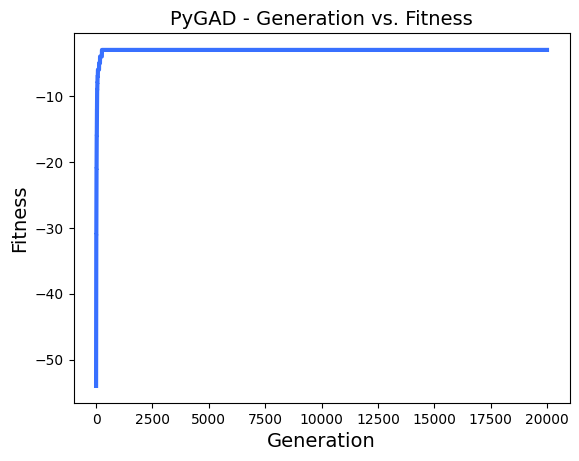

(400,
 200,
 20000,
 10,
 'sss',
 'single_point',
 'random',
 4,
 1023.8018500804901,
 -3,
 1023.8018500804901)

In [93]:
test_parameters(400, 200, 20000, 10, "sss", "single_point", "random", 4)

Sprawdzimy jak rozwój rozwiązań, będzie wyglądał dla różnych typów mutacji, ale już na mniejszej liczbie generacji, żeby zoptymalizować czas trwania prób.

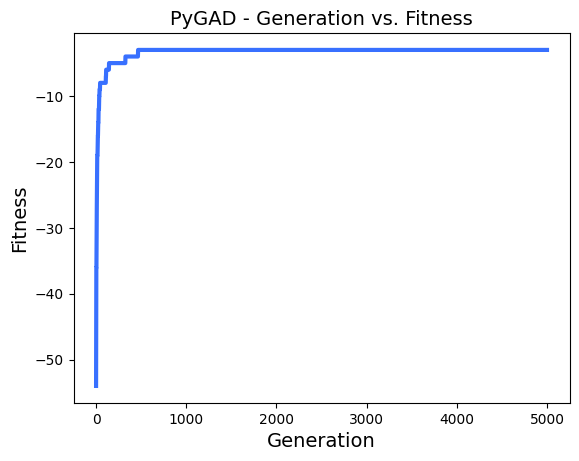

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'random',
 4,
 117.42271208763123,
 -3,
 117.42271208763123)

In [100]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "random", 4)

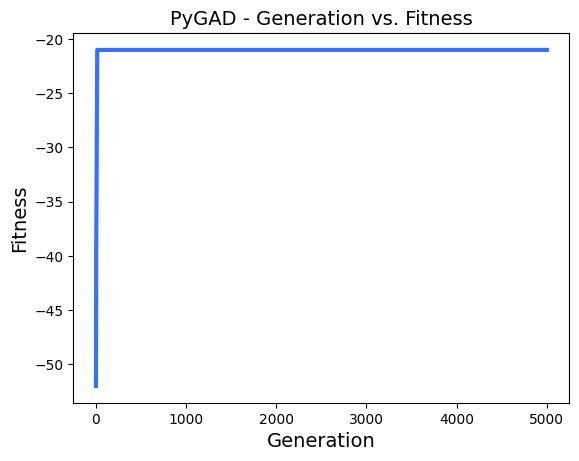

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'swap',
 4,
 79.40888404846191,
 -21,
 79.40888404846191)

In [103]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "swap", 4)

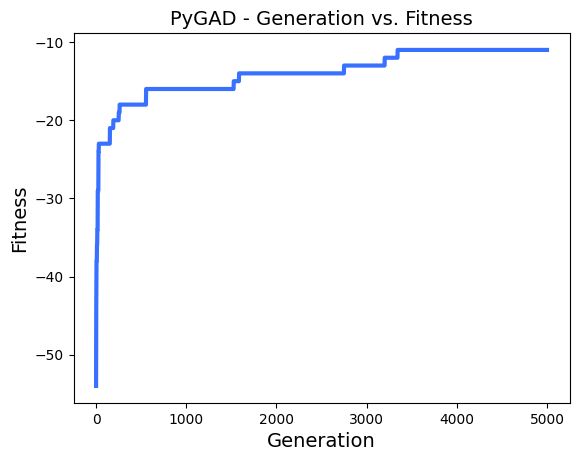

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'inversion',
 4,
 116.14902305603027,
 -11,
 116.14902305603027)

In [104]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "inversion", 4)

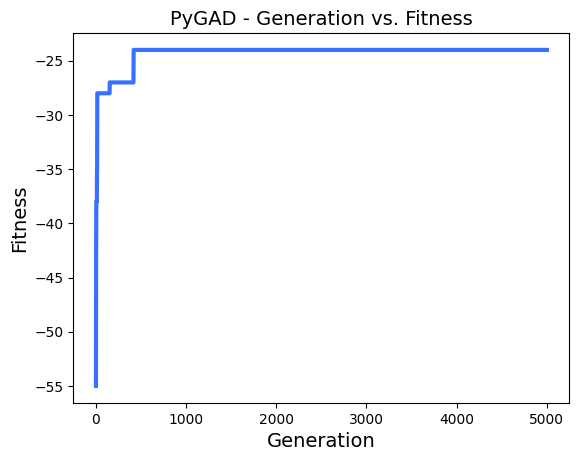

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'scramble',
 4,
 119.46561408042908,
 -24,
 119.46561408042908)

In [102]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "scramble", 4)

Po przeprowadzeniu kilku testów wygląda na to, że problmem jest brak zmienności. Przeprowadzimy te same testy jescze raz, ale z większym procentem mutacji

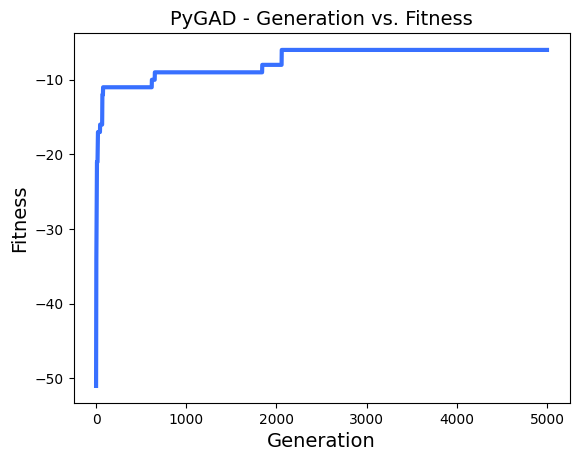

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'random',
 8,
 119.82731819152832,
 -6,
 119.82731819152832)

In [105]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "random", 8)

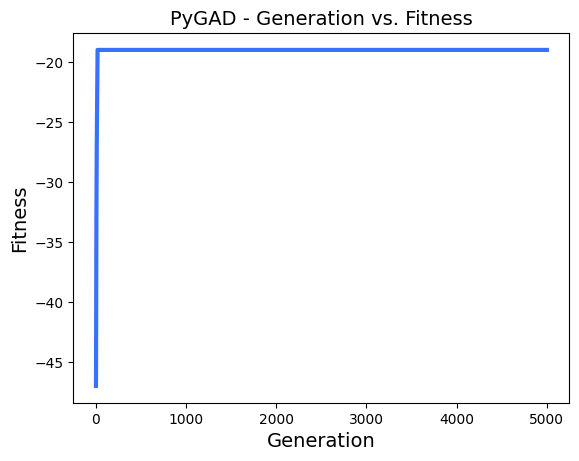

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'swap',
 8,
 91.36042618751526,
 -19,
 91.36042618751526)

In [106]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "swap", 8)

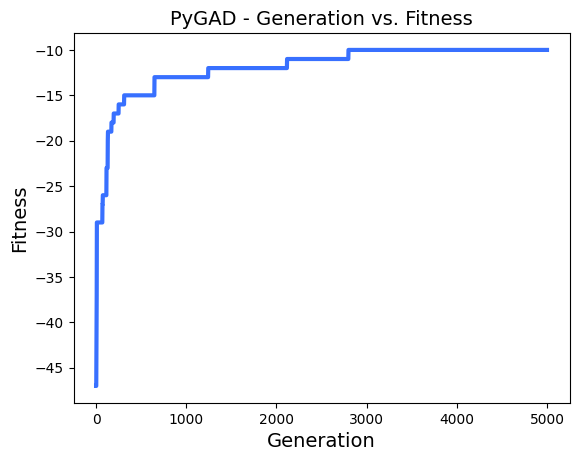

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'inversion',
 8,
 124.44585800170898,
 -10,
 124.44585800170898)

In [107]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "inversion", 8)

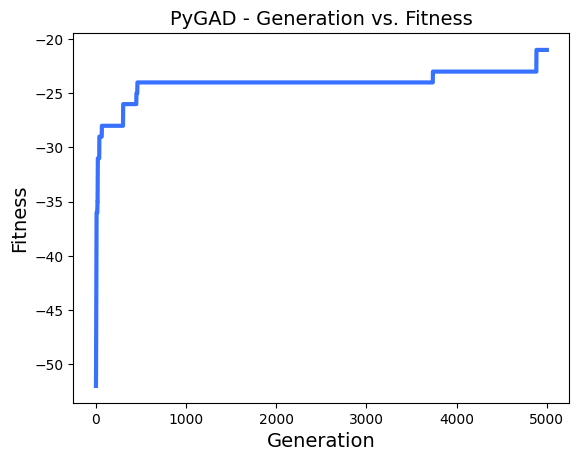

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'scramble',
 8,
 128.26891207695007,
 -21,
 128.26891207695007)

In [108]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "scramble", 8)

Z obu testów dla 4% szansy na mutację oraz 8% wyniki sa natępująe:   

1. Najgorzej wypadają metody: scramble i swap  
2.  Problemem wydaje się to, że rozwiązania bardzo długo się nie rozwijają. Szybko osiągają dany wynik i w większości przypadków do samego końca na nim pozostają.  
3. Za każdym razem najlepiej wypadała mutacja random z wynikami -3 i -6.   
4. Za każdym razem pod względem mutacji -  nie pozostawaniu przez cały czas z takim samym wynkiem najlepiej wygląda mutacja inversion, jednak osiągnęła ona wyniki gorsze od random.  


Następne testy 4 przeprowadzimy już tylko dla tych dwóch mutacji random i inversion. Zwiększymy znacząco szansę na mutację i zobaczymy czy poprawi to wyniki tych funkcji.  


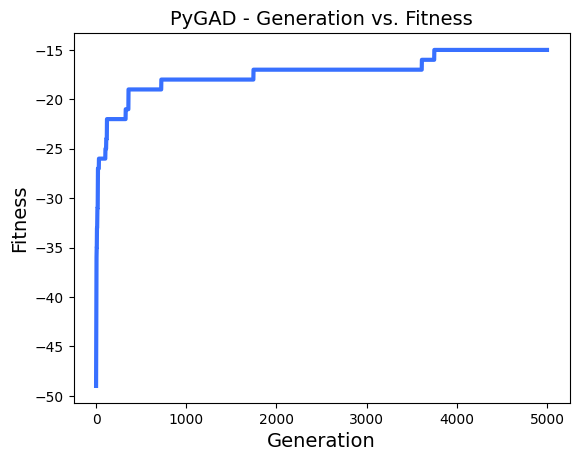

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'random',
 15,
 124.74702215194702,
 -15,
 124.74702215194702)

In [111]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "random", 15)

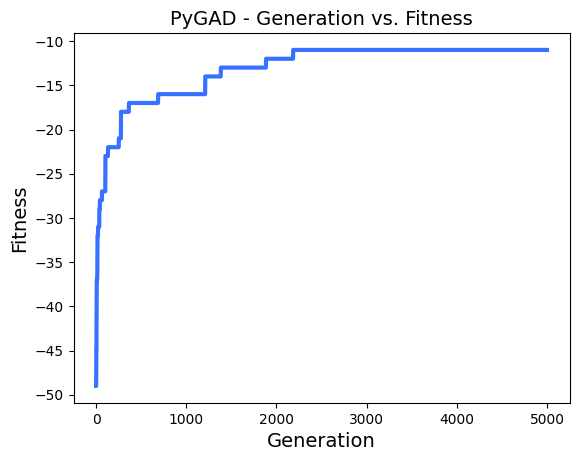

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'inversion',
 15,
 119.06359910964966,
 -11,
 119.06359910964966)

In [112]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "inversion", 15)

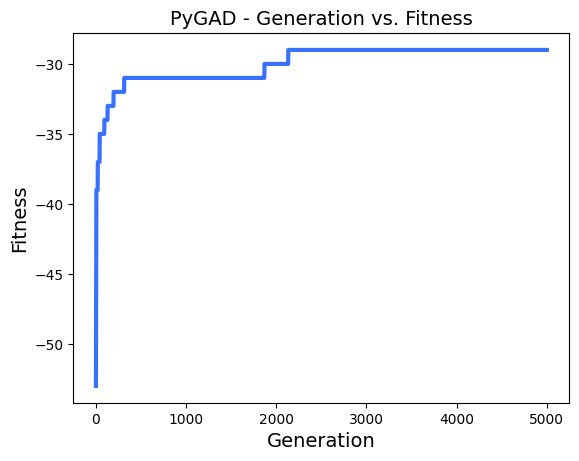

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'random',
 30,
 131.307382106781,
 -29,
 131.307382106781)

In [109]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "random", 30)

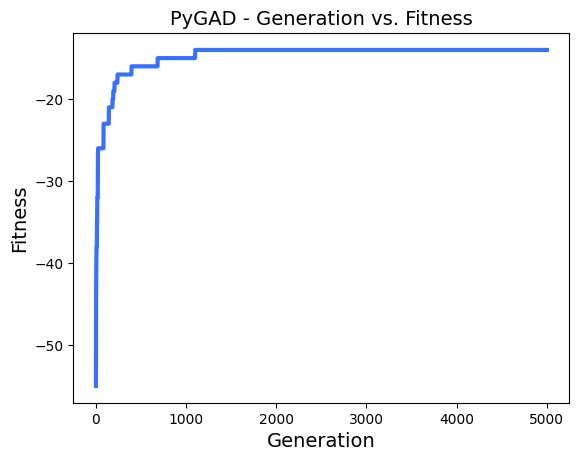

(200,
 25,
 5000,
 10,
 'sss',
 'single_point',
 'inversion',
 30,
 122.14960813522339,
 -14,
 122.14960813522339)

In [110]:
test_parameters(200, 25, 5000, 10, "sss", "single_point", "inversion", 30)

Jak widać, żadne z rozwiązań nie otrzymało wyniku 0, dlatego przeprowadzimy serię testów zmieniając różne parametry, a następnie przenalizujemy wyniki, żeby przetestować tak dużą liczbę kombinacji z racji zaobsrwowanej tendencji ustawimy w wywołaniu algorytmu warunek, że jeżeli przez daną liczbę pokoleń, wynik fitness function się nie poprawi, to zakończy się wykonywanie algorytmu.

Funkcja test_parameters została zmodyfikowana tak, że teraz dodatkowo przyjmuje parametr stop_criteria oraz zapisuje parametry z którymi została wywołana, fitness score oraz stop criteria w pliku o nazwie results.csv.

Żeby przeanalizować wyniki najpierw sprawdzimy czy jakieś parametry dały wynik 0 oraz czy fitness score dało wynik o 10 lub mniej oddalony od zera, ponieważ takie wyniki możemy uznać za dobre. (dobre w tym przypadku nie jest jednoznaczne z rozwiązane)  

In [544]:
import pandas as pd
import statistics
filename = "results_v2.csv"


def analyze_results(filename):
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Error: file '{filename}' not found")
        return

    filtered_df = df[(df['solution_fitness'] == 0) & (df['stop_criteria'] == "saturate_50")]
    filtered_df_2 = df[(df['solution_fitness'] >= -10) & (df['stop_criteria'] == "saturate_50")]

    params_list = filtered_df[['sol_per_pop', 'num_parents_mating', 'num_generations', 'keep_parents', 'parent_selection_type', 'crossover_type', 'mutation_type', 'mutation_percent_genes', 'num_genes', 'solution_fitness','duration', 'stop_criteria']].values.tolist()
    params_list_2 = filtered_df_2[['sol_per_pop', 'num_parents_mating', 'num_generations', 'keep_parents', 'parent_selection_type', 'crossover_type', 'mutation_type', 'mutation_percent_genes', 'num_genes', 'solution_fitness','duration', 'stop_criteria']].values.tolist()
    print("Number of tests",len(df))
    print("Number of solved sudoku:", len(params_list)) 
    print("Number of  \"good\" fitness solutions:", len(params_list_2))
    print()
    print("Average duration:{:.2f}".format( df['duration'].mean()), "seconds")
    print("Average score:{:.2f}".format( df['solution_fitness'].mean()))
 
    print()
    print()
   
    print("Percentage of solved sudoku: {:.2f}%".format(len(params_list) / len(df) * 100))
    print("Percentage of \"good\" solutions (>= -10): {:.2f}%".format(len(params_list_2) / len(df) * 100))
    


analyze_results(filename)


Number of tests 796
Number of solved sudoku: 1
Number of  "good" fitness solutions: 91

Average duration:6.50 seconds
Average score:-30.62
Standard deviation: 14.02
Mode: -45.00
Dominant: -45.00


Percentage of solved sudoku: 0.13%
Percentage of "good" solutions (>= -10): 11.43%


Okazuje się, że na prawie 800 przeprowadzonych testów tylko jedne parametry zwrócily wynik 0, czyli rozwiązane sudoku. A około 11% zwróciło wyniki, które przyjmujemy już za dobre. Teraz przeprowadzimy testy czy dla tych konkretnych parametrów, żeby sprawdzić czy uda nam się znowu osiągnąc zero. W tym celu 100 razy uruchomimy algorytm z tymi parametrami. Wyniki tych testów zapiszemy do pliku best_parameters.csv

In [144]:
for i in range(100):
    i+=1
    test_parameters(500, 25, 5000, 10, 'rank', 'uniform', 'random', 4,'saturate_50')

In [462]:
filename_2 = "best_parameters.csv"
analyze_results(filename_2)

Number of tests 104
Number of solved sudoku: 1
Number of  "good" fitness solutions: 99

Average duration:36.63 seconds
Average score:-4.25

Percentage of solved sudoku: 0.96%
Percentage of "good" solutions (>= -10): 95.19%


Jak widać powyżej wszystkie 100 testów było wynikami różniącymi się tylko o 10 lub mniej od finalnego rozwiązania oraz znowu udało nam się jeden raz osiągnąć zero. Biorąc pod uwagę te rezultaty uruchomimy algorytm jeszcze 5 razy, tylko tym razem dla 10 000 generacji, z warunkiem wcześniejszego zatrymania tylko wtedy, kiedy osiąągniemy 0 z fitness function. 

In [154]:
for i in range(4):
    i+=1
    test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"reach_0")

Tak prezentują się wyniki dla tych 5  uruchomień:
Jak widać średni wynik to -2.2 czyli wynik, który możemy uznać za bardzo dobry, jednak nie mamy, żadnego zera. Zwiększenie znacząco liczby generacji jest raczej nieefetywne, szczególnie patrząc na to ile wynosił śedni czas trwania wykonywania algorytmu, czyli ponad 10 minut.

Prawdopodbnie aby osiągnąć zero trzeba by puścić ten algorytm wiele razy, tak w przeprowadzonych powyżej 100 testach dla best_parameters, jednak bardziej wydajne pod względem czasu wykonywania wydaje się puszczenie tego algorytmu dla mniejszej liczby generacji i zrobienie tego wielokrotnie. Według otrzymanych danych można oszacować, że nawet stu-krotne puszczenie tego algorytmu z warunkiem zatrzymnia po 50 pokoleniach zajmie nam mniej czasu, niż 10-krotne puszczenie go dla 10 000 tysięcy generacji, aż do osiągnięcia zera.

In [453]:
filename = "best_parameters.csv"
df = pd.read_csv(filename)
filtered_df = df[(df['solution_fitness'] == 0) & (df['num_generations'] ==10000)]
df_10_000 = df[(df['num_generations'] == 10000)]

print("Number of solved sudoku:", len(filtered_df))
print("Number of tests:", len(df_10_000))
print("Average score:", df_10_000['solution_fitness'].mean())
print("Average duration:{:.2f}".format( df_10_000['duration'].mean()/60), "min")

Number of solved sudoku: 0
Number of tests: 5
Average score: -2.2
Average duration:10.29 min


Tak prezentuje się wykres dla jednego z tych uruchomień. Jak widać  nie udało nam się oiągnąć zera, i praktycznie od razu funkcja wpadła w lokalne minimum około 1 tys generacji i wynik już się nie zmienił.

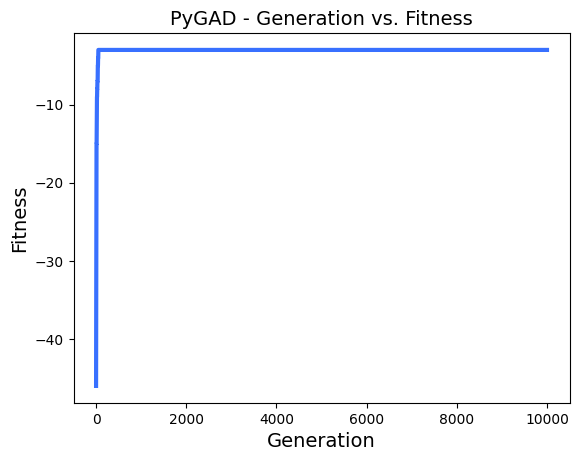

In [156]:
test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"reach_0")

### 1.6 Analiza efektywności parmetrów - dla różnych planszy

W calu przeprowadzenia analizy efektywności algorytmy dla każdego z 5 poziomów sudoku puścimy algorytm 100 razy dla każdego poziomu, wybierając losowo jaką planszę na danym poziomie będize rozwiązywał.Następnie zestawimy wyniki na wykresach. 

Z racji zaobserowwanej tendencji do dość szybkiego wpadania w lokalne minimum, żeby przeprowadzić takie testy ustawiamy parametr stop criteria na 50 pokoleń, w których nie doszło do poprawy wyniku. W celu sprawdzenia czy może większa liczba jednostek w pokoleniu wpłynie znacząco na trudniejsze poziomy przeprowadzimy testy dla wielkości  500 oraz 1500 jednostek w populacji.

Poniższa funkcja make_plots będize tworzyła dwa wykresy dla przeprowdzonych testów, zestawiając ze sobą efektywność parametró z 500 oraz 1500 jednostkami w populacji na podstawie czasu jaki trwało wykonanie algrytmu oraz jakie wyniki dla funckji fitness osiągneły.

In [532]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = "sudoku_3_4.csv"
def make_plots(file_name):
    df = pd.read_csv(file_name)


    fig = plt.figure(figsize=(8, 10))


    ax1 = fig.add_subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
    sol_500 = df[(df['sol_per_pop'] == 500)].reset_index(drop=True)
    sol_1500 = df[(df['sol_per_pop'] == 1500)].reset_index(drop=True)
    plt.plot(sol_500['duration'], label="sol_per_pop=500")
    plt.plot(sol_1500['duration'], label="sol_per_pop=1500")
    plt.title('Porównanie czasu działania algorytmu dla różnych rozmiarów populacji')
    plt.ylabel('Czas działania algorytmu [s]')
    plt.xlabel("Numer ekspertymentu")
    plt.legend()

    # Create the second subplot with side-by-side bar chart
    ax2 = fig.add_subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
   

    sol_500_fit_counts = df[df['sol_per_pop'] == 500]['solution_fitness'].value_counts().sort_index()
    sol_1500_fit_counts = df[df['sol_per_pop'] == 1500]['solution_fitness'].value_counts().sort_index()
    

    combined_data = pd.concat([sol_500_fit_counts, sol_1500_fit_counts], axis=1, keys=['sol_per_pop=500', 'sol_per_pop=1500'])


    ax = combined_data.plot(kind='bar', ax=ax2)
    ax.set_xlabel('Wynik fitness function')
    ax.set_ylabel('Liczba wystąpień')
    ax.set_title('Porównanie wartości funkcji celu dla różnych rozmiarów populacji')
    ax.legend()

    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()



#### Ekspryment 1 - sudoku poziom łatwy

Póżniej nazywany Eksperymentem A

In [191]:
import random

def random_number():
    return random.randint(0, 1)

for i in range(100):
    i +=1
    sudokus = [sudoku1, sudoku2, sudoku3]
    sudokus_names = ["sudoku1", "sudoku2"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num])
   


In [192]:
for i in range(100):
    i +=1
    sudokus = [sudoku1, sudoku2, sudoku3]
    sudokus_names = ["sudoku1", "sudoku2"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num])
   



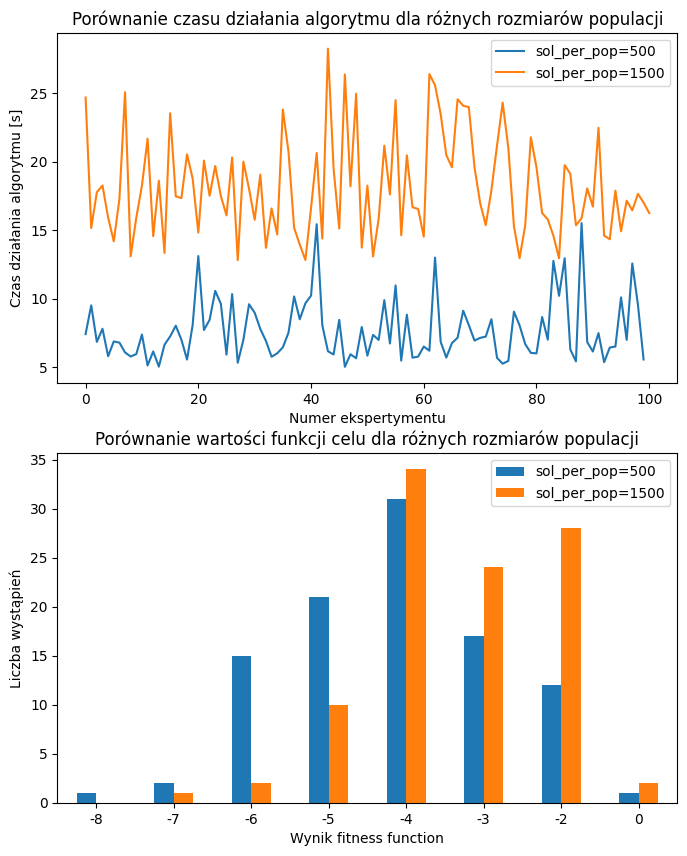

In [555]:
make_plots("sudoku_1_2.csv")


#### Ekspryment 1 - sudoku poziom średni

In [194]:
file_name = "sudoku_3_4.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku3, sudoku4]
    sudokus_names = ["sudoku3", "sudoku4"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   


In [205]:
file_name = "sudoku_3_4.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku3, sudoku4]
    sudokus_names = ["sudoku3", "sudoku4"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

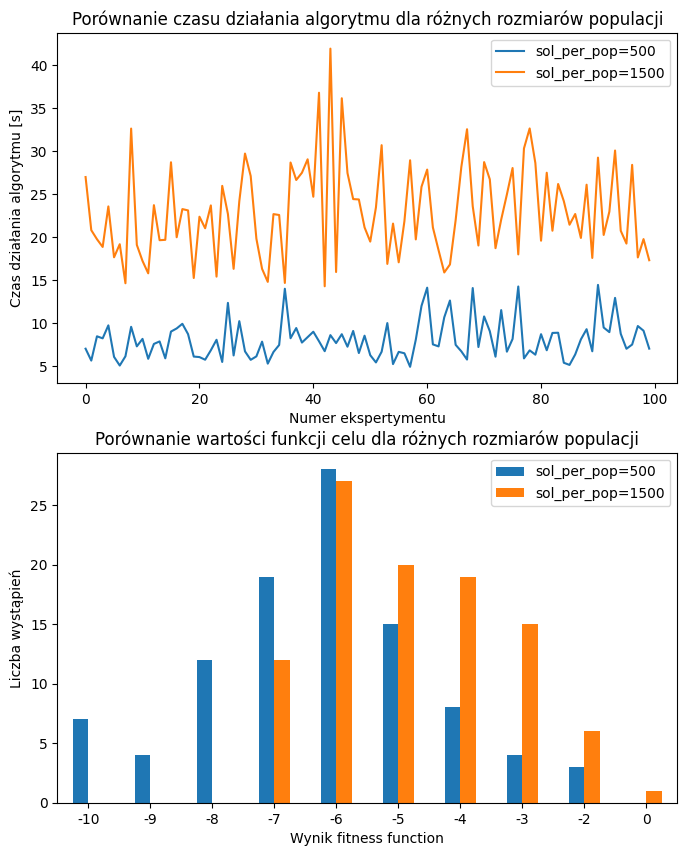

In [534]:
make_plots("sudoku_3_4.csv")

#### Ekspryment 1 - sudoku poziom trudny

In [195]:
file_name = "sudoku_5_6.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku5, sudoku6]
    sudokus_names = ["sudoku5", "sudoku6"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

In [206]:
file_name = "sudoku_5_6.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku5, sudoku6]
    sudokus_names = ["sudoku5", "sudoku6"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

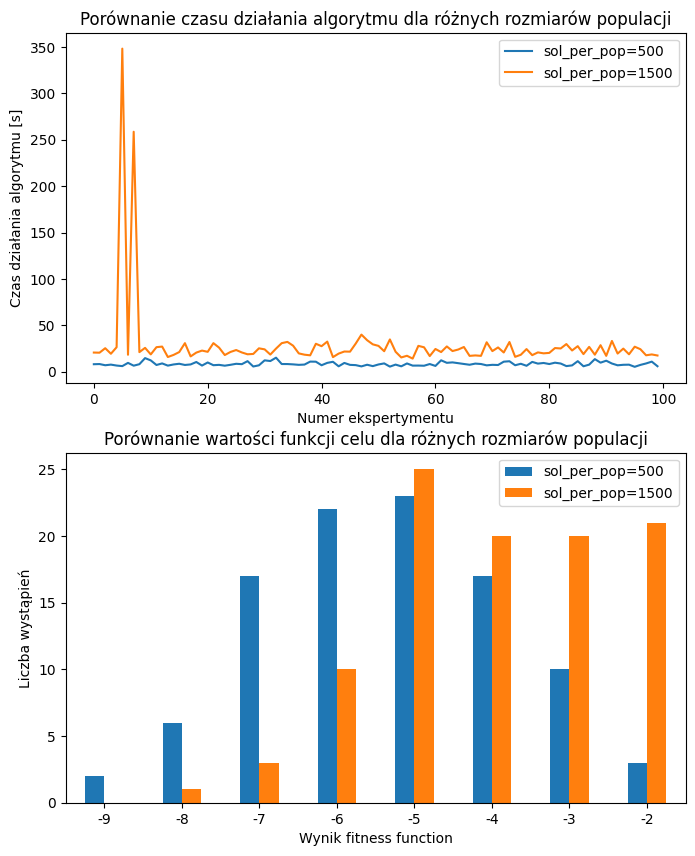

In [535]:
make_plots("sudoku_5_6.csv")

#### Ekspryment 1 - sudoku poziom bardzo trudny

In [196]:
file_name = "sudoku_7_8.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku7, sudoku8]
    sudokus_names = ["sudoku7", "sudoku8"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

In [207]:
file_name = "sudoku_7_8.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku7, sudoku8]
    sudokus_names = ["sudoku7", "sudoku8"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

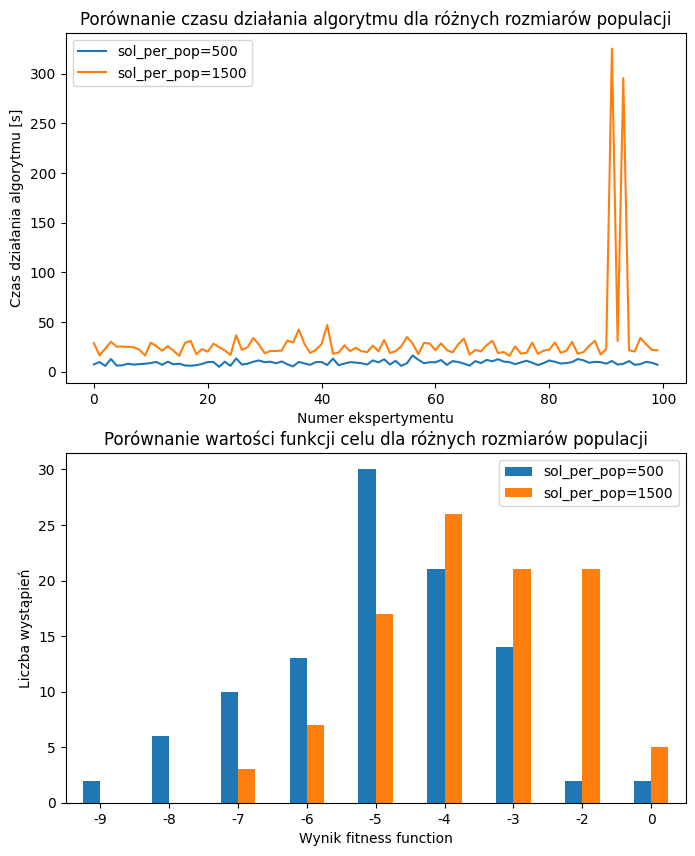

In [536]:
make_plots("sudoku_7_8.csv")

#### Ekspryment 1 - sudoku poziom ekspert

In [204]:
file_name = "sudoku_9_10.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku9, sudoku10]
    sudokus_names = ["sudoku9", "sudoku10"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

In [347]:
file_name = "sudoku_9_10.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku9, sudoku10]
    sudokus_names = ["sudoku9", "sudoku10"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50",sudokus_names[num],file_name)
   

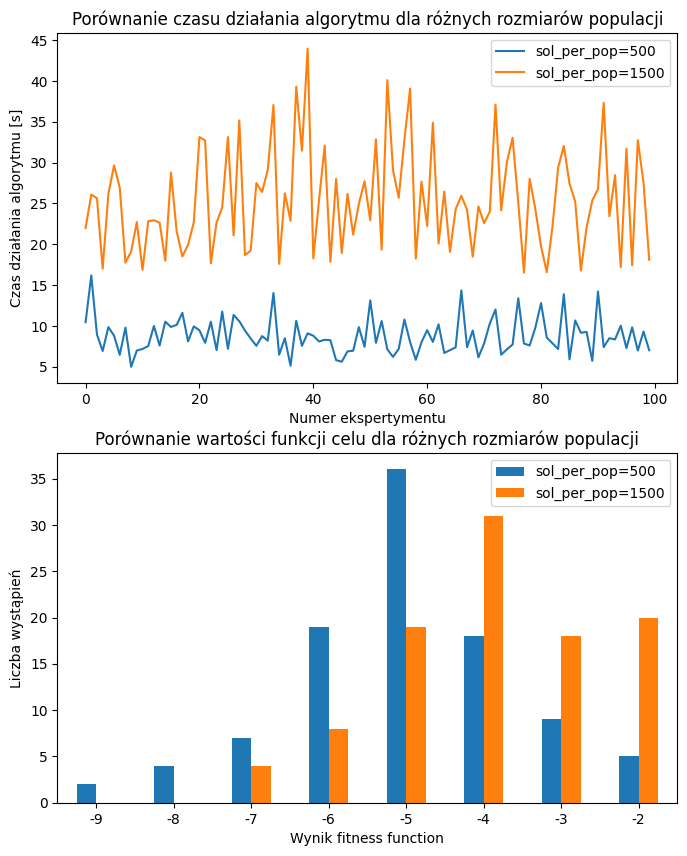

In [537]:
make_plots("sudoku_9_10.csv")

##### Zbiorcze podsumowanie eksperymentów

| poziom sudoku | populacja | liczba eksperymentów | średni wynik fitness function | mediana | odchylenie standardowe | dominanta | ilość wyników gdzie wartość fit_func=0 | średni czas trwania [s] |
|---------------|-----------|----------------------|-------------------------------|---------|------------------------|-----------|----------------------------------------|-------------------------|
| łatwy         | 500       | 100                  | -4.16                         | -4.0    | 1.39                   | -4.0      | 1                                      | 7.65                    |
| łatwy         | 1500      | 100                  | -3.29                         | -3.0    | 1.20                   | -4.0      | 2                                      | 18.19                   |
| średni        | 500       | 100                  | -6.28                         | -6.0    | 1.84                   | -6.0      | 0                                      | 8.05                    |
| średni        | 1500      | 100                  | -4.79                         | -5.0    | 1.51                   | -6.0      | 1                                      | 22.99                   |
| trudny        | 500       | 100                  | -5.36                         | -5.0    | 1.57                   | -5.0      | 0                                      | 8.39                    |
| trudny        | 1500      | 100                  | -3.96                         | -4.0    | 1.46                   | -5.0      | 0                                      | 28.80                   |
| bardzo trudny | 500       | 100                  | -4.94                         | -5.0    | 1.69                   | -5.0      | 2                                      | 8.88                    |
| bardzo trudny | 1500      | 100                  | -3.57                         | -4.0    | 1.55                   | -4.0      | 5                                      | 29.91                   |
| ekspert       | 500       | 100                  | -5.02                         | -5.0    | 1.47                   | -5.0      | 0                                      | 8.78                    |
| ekspert       | 1500      | 100                  | -3.89                         | -4.0    | 1.36                   | -4.0      | 0                                      | 25.38                   |

Patrząć na powyższe wykresy oraz tabelkę widać, że dla wszystkich poziomów i liczby populacji wyniki były w miarę zbliżone. Jednak należ zauważyć, że nieznacznie lepsze wyniki w większości przypadków osiągał algorytm z liczbą populacji, ale patrząc, żę wykonywał się on średnio około 2.5 raza dłużej dla każdego pojedynczego eksperymentu, nie jest to znaczna poprawa. Przy analizie czasu wykonywania  algorytmu trzeba jeszcze raz zanaczyć iż jest to czas wykonywania do osiągnięcia zera lub do minięcia 50 pokoleń bez poprawy wyniku funkcji fitness.

Patrząc na wyniki jako na całość można zuważyć, że na 1000 testów poprawnie rozwiązane sudoku otrzymalismy tylko 11 razy czyli rozwiązywalność sudoku tą metodą jest na poziomie 1.1%

### Rozdział 2.
Druga implementacja algorytmu genetycznego ze zmodyfikowaną funckją fitness oraz własną funkcją cross_over

#### 2.1 Modyfikacja funkcji fitness - funckja fitness nr 2

Funkcję repited_numbers pozostwimy bez zmina. Funkcję check_square będziemy podówjnie karać za błędne kwadraty. Najpierw sprwdzimy dla 100 testów i małego sudoku czy wpłynie znacząco zmiana fitness function.

In [408]:
def repetited_numbers(solution, lengthOfRow):
    if len(solution) == lengthOfRow ** 2:
        # reshape solution into a 2D list
        solution = [solution[i:i+lengthOfRow] for i in range(0, len(solution), lengthOfRow)]

   

    score = 0
    for i in range(lengthOfRow):
        # check for repeats in rows
        for j in range(lengthOfRow):
            for k in range(j+1, lengthOfRow):
                if solution[i][j] == solution[i][k]:
                    score += 1
        # check for repeats in columns
        for j in range(lengthOfRow):
            for k in range(j+1, lengthOfRow):
                if solution[j][i] == solution[k][i]:
                    score += 1
                    
  
    return score


def check_square(solution):
    score = 0
 
    for i in range(0, 9, 3):  # iterate over the 3x3 squares
        for j in range(0, 9, 3):
            # check for repeats in the current square
            square = []
            for x in range(i, i+3):
                for y in range(j, j+3):
                    square.append(solution[x][y])
            score += repetited_numbers(square,3)  # call the repited_numbers_2 function
            
    return score*2

sudoku_board = sudoku1  



def fitness_func2(solution, solution_idx):
    score = 0
    solution = transform_to_sudoku(solution, sudoku_board)
    score = repetited_numbers(solution, 9) + check_square(solution) 

    return -score




In [345]:
for i in range(100):
    i +=1
    sol =  test_parameters(500, 25, 10000, 10, 'rank', 'uniform', 'random', 4,"saturate_50","sudoku1","chapter_2.csv")


Patrząc na poniższą tabelkę reprezentującą wyniki dla sudoku1 z użyciem tych samych parametrów tylko ze zmienieniem funkcji fitness, nie widać praktycznie żadnej poprawy. Wyniki są niemal identyczne

| nazwa analizowanej funkcji | populacja | liczba eksperymentów | średni wynik fitness function | mediana | odchylenie standardowe | dominanta | ilość wyników gdzie wartość fit_func=0 | średni czas trwania [s] |
|----------------------------|-----------|----------------------|-------------------------------|---------|------------------------|-----------|----------------------------------------|-------------------------|
| funkcja fitness nr 1       | 500       | 100                  | -4.34                         | -5.00   | 1.40                   | -5.00     | 1                                      | 7.65                    |
| funkcja fitness nr 2       | 500       | 100                  | -4.58                         | -4.00   | 1.46                   | -4.00     | 0                                      | 7.89                    |

#### 2.2 Modyfikacja cross over 

Kolejną zmianą jaką wprowadzimy będzie własna funkcja cross_over, która będzie polegała na tym, że wymienimy ze sobą kwadraty 3x3 z sudoku A oraz sudoku B dodatkowo, żeby wprowadzić większą zmienność będziemy losować liczbę od 1-8 (w ten sposób nowe rozwiązanie zawsze będzie połączeniem dwóch, bo minimalnie jedna sekcja będize inna), która będzie oznaczała ile kadratów 3x3 zamieniamy oraz id które od 0-8, które będą wyznaczały już konkretne sekcje 3x3 które be∂ziemy wymieniać.

Dzięki temu zmiana wprowadzona przez nas w funkcji fitness czyli o wiele większe karanie za błedy w kwadratch może faktycznie znacząco wpłynąc na wynik.

In [587]:
import numpy as np
def get_square(sudoku, square_id):

    row_start = (square_id // 3) * 3 
    col_start = (square_id % 3) * 3  
    square = []
    for i in range(row_start, row_start+3):
        square.append(sudoku[i][col_start:col_start+3])
    return square



def set_square(sudoku, square_id, new_square):
    row_start = (square_id // 3) * 3 
    col_start = (square_id % 3) * 3  
    for i in range(row_start, row_start+3):
        for j in range(col_start, col_start+3):
            sudoku[i][j] = new_square[i-row_start][j-col_start]

    return sudoku



def get_fixed_places(sudoku_original, sudoku_solution):
    
    flat_original = np.array(sudoku_original).flatten()
    flat_solution = np.array(sudoku_solution).flatten()

   
    fixed_indices = np.nonzero(flat_original)[0]


    flat_solution[fixed_indices] = 0
    flat_solution = flat_solution[flat_solution != 0]

    return flat_solution
    

  
def cross_over_custom(parents,offspring_size,ga_instance):
    offspring = []
    
    idx = 0
    while len(offspring) != offspring_size[0]:
        parent1 = parents[idx % parents.shape[0], :].copy()
        parent2 = parents[(idx + 1) % parents.shape[0], :].copy()
        parent1 = transform_to_sudoku(parent1, sudoku_board)
        parent2 = transform_to_sudoku(parent2, sudoku_board)

    
        
        num = random.randint(1,8)
        ids = []
        for i in range(num):
            id  = random.randint(0,8)
            if id not in ids:
                ids.append(id)
        for i in ids:
           square =  get_square(parent2,i)
           modified_parent1 =  set_square(parent1,i,square)
        
       
        offspring.append(get_fixed_places(sudoku_board,modified_parent1))
        
   
         
        idx += 1 
    
    return np.array(offspring)

    

In [588]:
cross_over = cross_over_custom
fitness_function = fitness_func2



#### 2.3 Test efektywności ze zmodyfikowanymi parametrami

Przeprowadzimy test, żeby zbadać czy najlpesze parametry z funckją fitness nr 2 (wyniki w pliku custom_fitness.csv) oraz funkcja fitness nr 2 ze własną funkcją cross over (wyniki w pliku  custom_cross_fitness.csv) przyniosą lepsze efekty. Przeprowadzimy po 100 testów dla populacji 500, oraz 1500 dla losowao wybranych sudoku z poziomu latwy. 

In [410]:
file_name = "custom_cross_fitness.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku1, sudoku2]
    sudokus_names = ["sudoku1", "sudoku2"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', cross_over_custom, 'random', 4,"saturate_50",sudokus_names[num],file_name)
    
for i in range(100):
    i +=1
    sudokus = [sudoku1, sudoku2]
    sudokus_names = ["sudoku1", "sudoku2"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', cross_over_custom, 'random', 4,"saturate_50",sudokus_names[num],file_name)

Poniższa tabela zawera zestawienia wyników tych testów.  
   - <span style="font-size:larger;">Eksperyment A </span>- to algorytm z funkcją fitness numer 1 i nie zmieniamy innych parametrów z tych które znaleźliśmy jako najlepsze w poprzednim rozdziale.  
   - <span style="font-size:larger;">Eksperyment B</span> - to algorytm z funkcją fitness numer 2 i nie zmieniamy innych parametrów z tych które znaleźliśmy jako najlepsze w poprzednim rozdziale.  
   - <span style="font-size:larger;">Eksperyment C </span>- to algorytm z funkcją fitness numer 2 oraz zmienioną funkcją cros over na cross_over_custom zdefiniowaną przez nas. Pozostałe parametry pozostają bez zmian.   

Wszystkie ekseprymenty zostały przeprowadzone dla obu plansz sudoku z poziomu łatwy.

In [411]:
fitness_function = fitness_func

file_name = "custom_cross.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku1, sudoku2]
    sudokus_names = ["sudoku1", "sudoku2"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', cross_over_custom, 'random', 4,"saturate_50",sudokus_names[num],file_name)
    
for i in range(100):
    i +=1
    sudokus = [sudoku1, sudoku2]
    sudokus_names = ["sudoku1", "sudoku2"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', cross_over_custom, 'random', 4,"saturate_50",sudokus_names[num],file_name)



Porównując wyniki przedstawione w tabeli można stwierdzić, że wyniki są niemal identyczne, ale za to wydłużył się czas dla każdego z kolejnych eksperymentów.

| nazwa eksperymentu | populacja | liczba eksperymentów | średni wynik fitness function | mediana | dominanta | odchylenie standardowe fit_func | ilość wyników gdzie wartość fit_func=0 | średni czas trwania [s] |
|--------------------|-----------|----------------------|-------------------------------|---------|-----------|---------------------------------|----------------------------------------|-------------------------|
| Eksperyment A              | 500       | 100                  | -4.16                         | -4.0    | -4.0      | 1.39                            | 1                                      | 7.65                    |
|  Eksperyment A               | 1500      | 100                  | -3.29                         | -3.0    | -4.0      | 1.20                            | 2                                      | 18.9                    |
| Eksperyment B      | 500       | 100                  | -4.12                         | -4.0    | -4.0      | 1.46                            | 0                                      | 10.52                   |
| Eksperyment B      | 1500      | 100                  | -3.41                         | -3.5    | -4.0      | 1.31                            | 3                                      | 27.86                   |
| Eksperyment C      | 500       | 100                  | -4.18                         | -4.0    | -4.0      | 1.52                            | 1                                      | 10.78                   |
| Eksperyment C      | 1500       | 100                  | -3.4                          | -3.5    | -2.0      | 1.39                            | 3                                      | 27.60                   |


#### 2.4 Modyfikacja funkcji fitness - funkcja fitness nr 3
Zmienimy funkcję fitness jeszcze raz, w celu promowania rozwiązań gdzie całe kwadraty są poprawnie wypełnione. W tym celu będziemy dodatkowo odejmować -5 punktów za każdy kwadrat który nie jest w całości poprawny. Reszta funkcji fitness pozostaje bez zmian w stosunku do funkcji fitness nr 2

In [417]:
def check_square3(solution):
    score = 0
    penalty_for_wrong_square = 0
 
    for i in range(0, 9, 3):  # iterate over the 3x3 squares
        for j in range(0, 9, 3):
            # check for repeats in the current square
            square = []
            for x in range(i, i+3):
                for y in range(j, j+3):
                    square.append(solution[x][y])
            num = repetited_numbers(square,3) 
            score += num
            if num != 0:
                penalty_for_wrong_square += 5
            
    return score*2 + penalty_for_wrong_square

sudoku_board = sudoku1  


def fitness_func3(solution, solution_idx):
    score = 0
    solution = transform_to_sudoku(solution, sudoku_board)
    score = repetited_numbers(solution, 9) + check_square3(solution) 

    return -score

In [418]:
fitness_function = fitness_func3

file_name = "custom_cross_fitness3.csv"

for i in range(100):
    i +=1
    sudokus = [sudoku1, sudoku2]
    sudokus_names = ["sudoku1", "sudoku2"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(500, 25, 10000, 10, 'rank', cross_over_custom, 'random', 4,"saturate_50",sudokus_names[num],file_name)
    
for i in range(100):
    i +=1
    sudokus = [sudoku1, sudoku2]
    sudokus_names = ["sudoku1", "sudoku2"]
    num = random_number()
    sudoku_board = sudokus[num]
    sol =  test_parameters(1500, 25, 10000, 10, 'rank', cross_over_custom, 'random', 4,"saturate_50",sudokus_names[num],file_name)


Tak prezentują się wyniki tego eksperymentu. który w tablece został nazwany Eksperymentem C (funkcja fitness nr 3, własna funkcja cross over), a Eksperyment A oznacza eksepryment przeprowadzony również dla plansz sudoku1,sudoku2, ale z parametrami wybranymi w rozdziale 1 oraz funkcją fitness numer 1.

Nie widać tutaj różnicy w efektywności. Wyniki niemal się pokrywają z wyjątkiem czasu, który zdecydoanie się wydłużył dla Eksperymentu C. Z racji tych dwóch obserwacji nie będziemy już testować parametrów jak w eksperymencie C na trudniejszych planszach sudoku, bo wydaje się to bezcelowe.

| nazwa eksperymentu | populacja | liczba eksperymentów | średni wynik fitness function | mediana | dominanta | odchylenie standardowe fit_func | ilość wyników gdzie wartość fit_func=0 | średni czas trwania [s] |
|--------------------|-----------|----------------------|-------------------------------|---------|-----------|---------------------------------|----------------------------------------|-------------------------|
| Eksperyment A              | 500       | 100                  | -4.16                         | -4.0    | -4.0      | 1.39                            | 1                                      | 7.65                    |
| Eksperyment A             | 1500      | 100                  | -3.29                         | -3.0    | -4.0      | 1.20                            | 2                                      | 18.9                    |
| Eksperyment C      | 500       | 100                  | -3.96                         | -4.0    | -4.0      | 1.34                            | 0                                      | 10.85                   |
| Eksperyment C      | 1500      | 100                  | -3.41                         | -3.0    | -4.0      | 1.14                            | 1                                      | 26.89                   |


## Podsumowanie

Po przprowadzeniu wielu testów dla róznych parametrów oraz analizująć ich wyniki można stwierdić, że rozwiązywanie sudoku algorytmem genetycznym jest mało efektywne. Problemem z rozwiązywaniem sudoku w ten sposób jest to, że wynik bardzo szybko wpada w lokalne minimum i ani zwiekszenie liczby generacji ani mutacji nie pomogły rozwiązać tego problemu.

 Najlepszym sposobem na rozwiązywanie wydaje się wykonanie wielu iteracji z warunkiem zatrzymania po upłynięciu danej liczby pokoleń bez poprawy wyniku, ponieważ średnio szansa na otrzymanie w ten sposób wynosi 1% oraz pojedyncza iteracja nie zajmuje tak dużo czasu- kilk sekund,w porównaniu do pozwolenia, żeby algorytm został puszczony na dużej liczbie generacji - gdzie trwa to około 10 minut dla najłatwiejszego sudoku.

Zmienienie funkcji fitness i napisanie własnej funkcji cross over, które miało wpłynąć na to, że będziemy skupiać się na promowaniu sekcji planszy 3x3 też nie przyniosło pożądanego efektu. Jedyny znaczny efekt który przyniosły te modyfikacje to wydłużenie się czasu trwania algorytmu.

Mimo tego, wszystkie wyniki, które osiągamy za pomocą algorytmu możemy uznać za względnie dobre, dla każdego z przeprowadzonych eksperymentów.



### Bibliografia
https://sudoku.com/pl  
https://gameplanet.onet.pl/artykuly/zasady-gry-w-sudoku-jak-grac-w-sudoku/jr6w8pc  
https://www.geeksforgeeks.org/project-idea-genetic-algorithms-for-graph-colouring/  
https://en.wikipedia.org/wiki/Graph_coloring  
https://osuva.uwasa.fi/bitstream/handle/10024/10326/Osuva_Amil_Mantere_2019a.pdf?sequence=2&isAllowed=y  
http://fendrich.se/blog/2010/05/05/solving-sudoku-with-genetic-algorithms/  
https://www.sciencedirect.com/science/article/pii/S2211812814004696  
